In [1]:
# importing the dependencies
from tensorflow.keras.models import load_model
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import os

In [2]:
# defining a function for plotting the confusion matrix
# takes cmNormalized
os.environ['QT_PLUGIN_PATH'] = ''
def plot_cm(cM, labels,title):
    # normalizing the confusionMatrix for showing the probabilities
    cmNormalized = np.around((cM/cM.sum(axis=1)[:,None])*100,2)
    # creating a figure object
    fig = plt.figure()
    # plotting the confusion matrix
    plt.imshow(cmNormalized,interpolation=None,cmap = plt.cm.Greens)
    # creating a color bar and setting the limits
    plt.colorbar()
    plt.clim(0,100)
    # assiging the title, x and y labels
    plt.xlabel('Predicted Values')
    plt.ylabel('Ground Truth')
    plt.title(title + '\n%age confidence')
    # defining the ticks for the x and y axis
    plt.xticks(range(len(labels)),labels,rotation = 60)
    plt.yticks(range(len(labels)),labels)
    # number of occurences in the boxes
    width, height = cM.shape 
    print('Accuracy for each class is given below.')
    for predicted in range(width):
        for real in range(height):
            color = 'black'
            if(predicted == real):
                color = 'white'
                print(labels[predicted].ljust(12)+ ':', cmNormalized[predicted,real], '%')
            plt.gca().annotate(
                    '{:d}'.format(int(cmNormalized[predicted,real])),xy=(real, predicted),
                    horizontalalignment = 'center',verticalalignment = 'center',color = color)
    # making sure that the figure is not clipped
    plt.tight_layout()
    # saving the figure
    fig.savefig(title +'.png')


# Creating and plotting a confusion matrix

1956/1 - 0s
Accuracy for each class is given below.
pushup      : 81.28 %
sidebend    : 100.0 %
sidecrunch  : 99.06 %
situp       : 100.0 %
squat       : 92.24 %


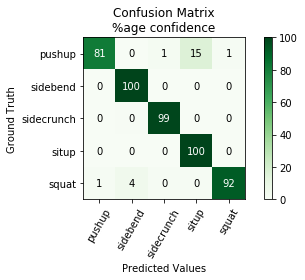

In [3]:
# loading the pretrained model, estData and groundTruth data
model = load_model('model.h5')

test_x = np.load('testData.npy')
groundTruth = np.load('groundTruth.npy')
#test_x = np.load('model_testData.npy')
#groundTruth = np.load('model_groundTruth.npy')
#score = model.evaluate(test_x,groundTruth,verbose=2)


labels = ['break','pushup','sidebend','sidecrunch','situp','squat'] # 이게 맞는거
labels = ['pushup','sidebend','sidecrunch','situp','squat']

"""xxx = model.predict_classes(test_x)
print('predict',xxx)

answer=[]
for i in groundTruth:
    answer.append(*np.where(i==1)[0])
print('answer',answer)"""

predictions = model.predict(test_x,verbose=2)

# getting the class predicted and class in ground truth for creation of confusion matrix
predictedClass = np.zeros((predictions.shape[0]))
groundTruthClass = np.zeros((groundTruth.shape[0]))
for instance in range (groundTruth.shape[0]):
    predictedClass[instance] = np.argmax(predictions[instance,:])
    groundTruthClass[instance] = np.argmax(groundTruth[instance,:])

# obtaining a confusion matrix  
cm = metrics.confusion_matrix(groundTruthClass,predictedClass)

# plotting the confusion matrix
plot_cm(cm, labels,'Confusion Matrix')